# Speech To Text Statistics
## TOC:
* [Speech To Text nBest Version Compare](#Speech-To-Text-nBest-Version-Compare)

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

import utils as utils
import context_utils as ctutils
import data_loader as dataloader

import word_error_rate as werutils
import text_cleanup as cleanup

## Speech To Text nBest Version Compare


In [4]:
# todo
# vergleich von n-best; wie stark unterscheiden sich die 3 varianten überhaupt?
# (WER vergleich zu Orginaltranskription)

# 3 mal das vorhandene WER diagramm nebeneinander als subplot
# gibt auch einen output als tabelle davon (zurzeti in text file geoutputet)
# optional: 3 balken mit gesamt WER

stt_nbests = dataloader.load_stt_nbests()
print('# stt nbest files loaded:\t', len(stt_nbests))

nbest_wers = [None] * len(stt_nbests)
for i, current_nbest in enumerate(stt_nbests):
    human_trascript = dataloader.load_human_transcription(current_nbest.name)
    current_wers = [None] * len(current_nbest.transcriptions)
    
    for j, current_transcription in enumerate(current_nbest.transcriptions):
        cleaned_human_transcript = cleanup.clean_up_text(human_trascript)
        cleaned_current_transcript = cleanup.clean_up_text(current_transcription)
        current_wers[j] = werutils.word_error_rate(cleaned_human_transcript, cleaned_current_transcript)
    
    nbest_wers[i] = current_wers

print('# stt wers calculated:\t\t', len(nbest_wers))


avg_wer = np.zeros(3, dtype = float)
avg_items_counter = np.zeros(3, dtype = float)
for i,wer in enumerate(nbest_wers):
    for j in range(len(nbest_wers[i])):
        avg_wer[j] += nbest_wers[i][j]
        avg_items_counter[j] += 1

for i in range(len(avg_wer)):
    avg_wer[i] /= avg_items_counter[i]

print(avg_wer)

# stt nbest files loaded:	 102
# stt wers calculated:		 102
[ 8.55433172 12.68889751 13.32469423]


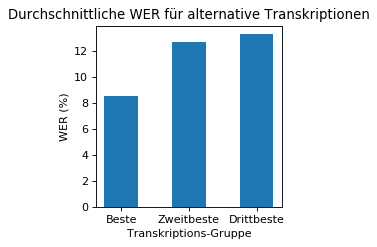

In [5]:
plt.figure(figsize=(3, 3), dpi=80)
plt.subplot()

wer_names = ['Beste', 'Zweitbeste', 'Drittbeste']
plt.bar(wer_names, avg_wer, width=0.5)
plt.ylabel('WER (%)')
plt.xlabel('Transkriptions-Gruppe')
plt.title('Durchschnittliche WER für alternative Transkriptionen')
plt.show()

In [6]:
nbest_wers = [None] * len(stt_nbests)
for i, current_nbest in enumerate(stt_nbests):
    cleaned_nbest1 = cleanup.clean_up_text(current_nbest.transcriptions[0])
    cleaned_nbest2 = cleanup.clean_up_text(current_nbest.transcriptions[1])
    if len(current_nbest.transcriptions) > 2:
        cleaned_nbest3 = cleanup.clean_up_text(current_nbest.transcriptions[2])

    current_wers = [None] * 3
    current_wers[0] = werutils.word_error_rate(cleaned_nbest1, cleaned_nbest2)
    current_wers[1] = werutils.word_error_rate(cleaned_nbest1, cleaned_nbest3)
    if len(current_nbest.transcriptions) > 2:
        current_wers[2] = werutils.word_error_rate(cleaned_nbest2, cleaned_nbest3)

    nbest_wers[i] = current_wers

print('# stt wers calculated:\t\t', len(nbest_wers))

avg_wer = np.zeros(3, dtype = float)
avg_items_counter = np.zeros(3, dtype = float)
for i,wer in enumerate(nbest_wers):
        for j in range(len(nbest_wers[i])):
            if nbest_wers[i][j] is not None:
                avg_wer[j] += nbest_wers[i][j]
                avg_items_counter[j] += 1

for i in range(len(avg_wer)):
    avg_wer[i] /= avg_items_counter[i]


print('1 vs 2:\t\t', avg_wer[0])
print('1 vs 3:\t\t', avg_wer[1])
print('2 vs 3:\t\t', avg_wer[2])

# stt wers calculated:		 102
1 vs 2:		 7.870054233859899
1 vs 3:		 9.339514293927481
2 vs 3:		 10.46568671993803


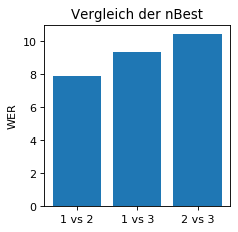

In [7]:
plt.figure(figsize=(3, 3), dpi=80)
plt.subplot()

wer_names = ['1 vs 2', '1 vs 3', '2 vs 3']
plt.bar(wer_names, avg_wer)
plt.ylabel('WER')
plt.title('Vergleich der nBest')
plt.show()